
## Introducción a las Redes Neuronales

### Resumen
En este notebook vamos a ver como definir y entrenar una red neuronal. Los pasos a seguir generalmente son:
- Definir la arquitectura de la red neuronal.
- Definir la función loss, métrica y optimizador que vamos a usar durante el entrenamiento.
- Compilar el modelo, i.e, asignarle al modelo las funciones necesarios para su entrenamiento.
- Entrenar el modelo.

Importamos los paquetes necesarios

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
import PyQt5
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

Para el primer ejemplo vamos a usar el famoso dataset MNIST, el cual se compone por 70.000 imágenes de números escritos a mano de 28x28 píxeles. Veamos un ejemplo:

Número de elementos en el dataset =  70000


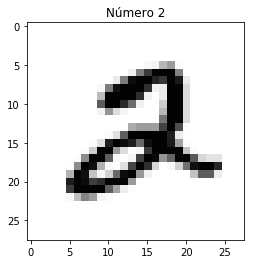

In [7]:
%matplotlib inline
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

print('Número de elementos en el dataset = ',X_train.shape[0]+X_validation.shape[0])
plt.title('Número '+str(y_train[5]))
plt.imshow(X_train[5], cmap='Greys')
plt.show()

Vamos a definir una red neuronal. La red tendrá las siguientes características:
- Una entrada de 28x28, la cual se vectoriza con la capa Flatten, ya que la capa Dense espera un tensor (¿?) de dimensión (batch_size, n_features).
- Una capa oculta con 20 neuronas y función de activación sigmoid.
- La capa output tiene una salida de tamaño 10 (0,1,2...,9) y función de activación softmax(¿?).
- En total la Red Neuronal tiene 15.910 parámetros (¿Por que?).

### Simple model

In [10]:
# capas de la red
input = Input(shape=(28,28))
input_flat = layers.Flatten()(input)
layer_1 = layers.Dense(units=20, activation='sigmoid')(input_flat)
output = layers.Dense(units=10, activation='softmax')(layer_1)

# creamos el modelo
simple_model = Model(inputs=input, outputs=output, name='simple_model')
print(simple_model.summary())

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
None


Vamos a definir las funciones necesarias para el entrenamiento y asignárselas a nuestro modelo. Vamos a utilizar el SGD con minibatch para hacer un entrenamiento eficiente. Al ser un problema de clasificación multiclase utilizaremos la función loss SparseCategoricalCrossentropy y la métrica accuracy.

In [11]:
# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
simple_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Para ver diferentes capas, métricas, losses, optimizadores... podemos visitar las siguientes páginas:
- [Keras API](https://keras.io/api/)
- [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras)

En ellas se puede encontrar todo lo necesario para definir y entrenar modelos de deep learning.
Finalmente vamos a entrenar la red neuronal en el dataset y ver que score tiene en el dataset de validación.
El batch_size es el número de elementos que se usa para modificar los pesos de la red en cada paso del entrenamiento. Y las epochs son el número de veces que repetiremos el dataset para entrenar el modelo.

In [14]:
# entrenamos
history = simple_model.fit(x=X_train, y=y_train, batch_size=20, epochs=10,
                 validation_data=(X_validation, y_validation))

Epoch 1/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4259 - accuracy: 0.8674 - val_loss: 0.4435 - val_accuracy: 0.8684
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4698 - accuracy: 0.8565 - val_loss: 0.4556 - val_accuracy: 0.8603
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4400 - accuracy: 0.8697 - val_loss: 0.4068 - val_accuracy: 0.8783
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4351 - accuracy: 0.8718 - val_loss: 0.4307 - val_accuracy: 0.8710
Epoch 5/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4517 - accuracy: 0.8659 - val_loss: 0.4092 - val_accuracy: 0.8776
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4472 - accuracy: 0.8661 - val_loss: 0.4050 - val_accuracy: 0.8844
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4207 - accuracy: 0.8744 - val_loss: 0.4173 - val_accuracy:

In [18]:
# predecimos con el modelo entrenado los 10 primero elementos del dataset
y_true = y_validation[:10]
print('y_true:', y_true)

y_pred = simple_model.predict(X_validation[:10])
print('y_pred:', np.argmax(y_pred, axis=-1))  # ¿argmax?

y_true: [7 2 1 0 4 1 4 9 5 9]
y_pred: [7 2 1 0 4 1 4 9 6 7]


### Big model
Podemos generar un modelo un poco más grande para obtener unos mejores resultados.

In [45]:
# capas del modelo
input = Input(shape=(28,28))
input_flat = layers.Flatten()(input)
layer_1 = layers.Dense(units=100, activation='sigmoid')(input_flat)
layer_2 = layers.Dense(units=50, activation='sigmoid')(layer_1)
output = layers.Dense(units=10, activation='softmax')(layer_2)

# creamos y compilamos el modelo
big_model = Model(inputs=input, outputs=output, name='simple_model')
print(big_model.summary())
big_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# entrenamos
history = big_model.fit(x=X_train, y=y_train, batch_size=20, epochs=10,
                           validation_data=(X_validation, y_validation))

Epoch 1/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1157 - accuracy: 0.7774 - val_loss: 0.5856 - val_accuracy: 0.8837
Epoch 2/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4768 - accuracy: 0.8892 - val_loss: 0.3967 - val_accuracy: 0.9014
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3745 - accuracy: 0.9032 - val_loss: 0.3315 - val_accuracy: 0.9134
Epoch 4/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3362 - accuracy: 0.9091 - val_loss: 0.3049 - val_accuracy: 0.9177
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3123 - accuracy: 0.9138 - val_loss: 0.3028 - val_accuracy: 0.9160
Epoch 6/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3023 - accuracy: 0.9176 - val_loss: 0.2872 - val_accuracy: 0.9181
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2857 - accuracy: 0.9197 - val_loss: 0.2847 - val_accuracy:

In [42]:
# predecimos con el modelo grande
print('y_true:', y_true)
y_pred = big_model.predict(X_validation[:10])
print('y_pred:', np.argmax(y_pred, axis=-1))

y_true: [7 2 1 0 4 1 4 9 5 9]
y_pred: [7 2 1 0 4 1 4 9 6 9]


Hemos reducido un 45% el error cometido. ¿?

### Problema sintético
Ahora vamos a trabajar con un problema sintético de regresión. Para ello lo primero es generar un dataset. En este caso solo generaremos un dataset de entrenamiento.

In [3]:
# Datos sintéticos
X_data = np.random.random(size=(1000,2))*5
y_data = (X_data[:,0].astype('int32') + X_data[:,1])/20

Veamos que forma tiene el dataset. ¿Sencillo?

In [5]:
# representamos el dataset
%matplotlib qt
# %matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_data[:,0], X_data[:,1], y_data, c='r')
#plt.show()

![](images/dataset_sintetico.png)

Vemos que es un problema de regresión no continua.
Generemos un modelo relativamente grande para ver si podemos aproximar dichos puntos con una red neuronal.

In [29]:
# capas del modelo
input = Input(shape=2)
layer_1 = layers.Dense(units=5000, activation='sigmoid')(input)
layer_1 = layers.Dense(units=1000, activation='sigmoid')(layer_1)
layer_1 = layers.Dense(units=200, activation='sigmoid')(layer_1)
output = layers.Dense(units=1, activation=None)(layer_1)

# creamos y compilamos el modelo
simple_model = Model(inputs=input, outputs=output)
loss = MSE
metrics = ['mse']
simple_model.compile(optimizer='SGD', loss=loss, metrics=metrics)

# entrenamos
history = simple_model.fit(x=X_data, y=y_data, batch_size=100, epochs=2000)

Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 2ms/step - loss: 0.0693 - mse: 0.0693
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - mse: 0.0158
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.0124 - mse: 0.0124
Epoch 4/2000
10/10 [==============================] - 0s 3ms/step - loss: 0.0113 - mse: 0.011

Incluso con un modelo grande no hemos podido aproximar el train dataset!!!!
![](images/predicciones_dataset_sintetico1.png)

Si probamos con otro optimizador y cambiando las funciones de activación, incluso con una red mas pequeña conseguimos aproximar el dataset

In [39]:
# capas del modelo
input = Input(shape=2)
layer_1 = layers.Dense(units=500, activation='relu')(input)
layer_1 = layers.Dense(units=200, activation='relu')(layer_1)
layer_1 = layers.Dense(units=100, activation='relu')(layer_1)
output = layers.Dense(units=1, activation=None)(layer_1)

# creamos y compilamos el modelo
simple_model = Model(inputs=input, outputs=output)
loss = MSE
metrics = ['mse']

# compilamos con Adam
simple_model.compile(optimizer='Adam', loss=loss, metrics=metrics)

# entrenamos
history = simple_model.fit(x=X_data, y=y_data, batch_size=100, epochs=2000)

Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 887us/step - loss: 0.0205 - mse: 0.0205
Epoch 2/2000
10/10 [==============================] - 0s 809us/step - loss: 0.0035 - mse: 0.0035
Epoch 3/2000
10/10 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 4/2000
10/10 [==============================] - 0s 720us/step - loss: 6.2601e-0

In [16]:
y_prediction = simple_model.predict(X_data)
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_data[:,0], X_data[:,1], y_prediction, c='r')
#plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


![](images/predicciones_dataset_sintetico2.png)
Es un problema muy complejo!

### Modelos no secuenciales
Podemos crear estructuras más complejas, como por ejemplo una red con dos flujos en paralelo.

In [68]:
# capas del modelo
input = Input(shape=2)
layer_1_a = layers.Dense(units=50, activation='sigmoid')(input)
layer_2_a = layers.Dense(units=10, activation='sigmoid')(layer_1_a)
layer_1_b = layers.Dense(units=50, activation='sigmoid')(input)
layer_2_b = layers.Dense(units=10, activation='sigmoid')(layer_1_b)
layer_2 = tf.concat([layer_2_a, layer_2_b], axis=-1)
output = layers.Dense(units=1, activation=None)(layer_2)
doble_model = Model(inputs=input, outputs=output)
print(doble_model.summary())

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_79 (Dense)                (None, 50)           150         input_26[0][0]                   
__________________________________________________________________________________________________
dense_81 (Dense)                (None, 50)           150         input_26[0][0]                   
__________________________________________________________________________________________________
dense_80 (Dense)                (None, 10)           510         dense_79[0][0]                   
______________________________________________________________________________________

### CIFAR 10
Ahora vamos a probar con un dataset mas complejo

In [54]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_validation, y_validation) = cifar10.load_data()
X_train = X_train/255
X_validation = X_validation/255

Número de elementos en el dataset =  60000


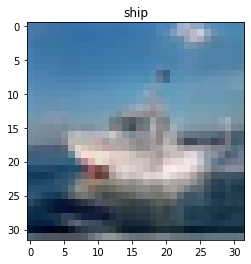

In [55]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Número de elementos en el dataset = ',X_train.shape[0]+X_validation.shape[0])
plt.title(labels[int(y_train[62])])
plt.imshow(X_train[62])
plt.show()

In [58]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1000, activation='sigmoid')(input_flat)
layer = layers.Dense(units=500, activation='sigmoid')(layer)
layer = layers.Dense(units=200, activation='sigmoid')(layer)
output = layers.Dense(units=10, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_24 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2010      
Total params: 3,675,710
Trainable params: 3,675,710
Non-trainable params: 0
___________________________________________

In [59]:
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1667/1667 [==============================] - 60s 36ms/step - loss: 2.2962 - accuracy: 0.1195 - val_loss: 2.2803 - val_accuracy: 0.1214
Epoch 2/20
1667/1667 [==============================] - 65s 39ms/step - loss: 2.2581 - accuracy: 0.1623 - val_loss: 2.2238 - val_accuracy: 0.1476
Epoch 3/20
1667/1667 [==============================] - 42s 25ms/step - loss: 2.1689 - accuracy: 0.1964 - val_loss: 2.1162 - val_accuracy: 0.1982
Epoch 4/20
1667/1667 [==============================] - 37s 22ms/step - loss: 2.0846 - accuracy: 0.2293 - val_loss: 2.0579 - val_accuracy: 0.2368
Epoch 5/20
1667/1667 [==============================] - 37s 22ms/step - loss: 2.0341 - accuracy: 0.2520 - val_loss: 2.0093 - val_accuracy: 0.2708
Epoch 6/20
1667/1667 [==============================] - 37s 22ms/step - loss: 1.9944 - accuracy: 0.2703 - val_loss: 1.9730 - val_accuracy: 0.2784
Epoch 7/20
1667/1667 [==============================] - 43s 26ms/step - loss: 1.9610 - accuracy: 0.2860 - val_loss: 1.9461 -

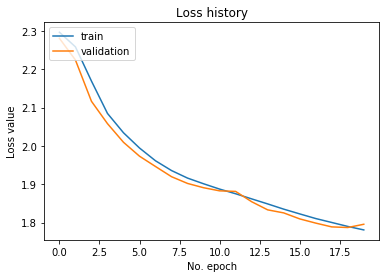

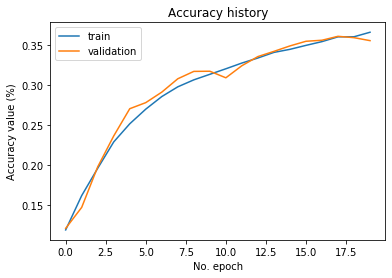

In [68]:
from aux_func import show_history
show_history(history)

Probar con pocas capas y neuronas e ir aumentando para ver la evolución del score. (fijar número de capas y hacer una gráfica nº neuronas vs score)
¿Qué pasa si la profundidad de la red es muy grande? Intentar dar alguna explicación de porque pasa eso.

El score es malo por varias razones: el tipo de arquitectura, la función de activación y el optimizador no son los correctos.

Si por ejemplo probamos con un random forest obtenemos lo siguiente:

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))
print('score rf = ',clf.score(X_validation.reshape((X_validation.shape[0],-1)), y_validation.reshape((-1,1))))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


score rf =  0.3577


Si cambiamos la función de activación...

In [67]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=2000, activation='relu')(input_flat)
layer = layers.Dense(units=1000, activation='relu')(layer)
layer = layers.Dense(units=500, activation='relu')(layer)
layer = layers.Dense(units=200, activation='relu')(layer)
layer = layers.Dense(units=100, activation='relu')(layer)
output = layers.Dense(units=10, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=20,
                    validation_data=(X_validation, y_validation))

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 2000)              6146000   
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_29 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_30 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_31 (Dense)             (None, 100)             

KeyboardInterrupt: 

### CIFAR 100
Intentar conseguir el mejor score (fine tuning) con el dataset CIFAR 100 (se puede utilizar arquitecturas no secuenciales).
Hacer distintas predicciones con la red y plotear los resultados.

Comparar, con la función show_history, el performance de varias (<10) NN's con distintas neuronas y capas.
Obtener las siguientes gráficas (longitud <20):
- score vs Batch_size (con la arquitectura conseguida previamente)
- score vs nº neuronas (con las capas de la arquitectura conseguida previamente)

Hacer la comparativa de scores (acc, recall, precision, f1, confusion matrix) entre los siguientes modelos:
- Random Forest
- Otro modelo a elegir de Machine Learning
- Una red neuronal